WhiteIslandFinal26Hours_VEL.mseed exists. Reading.
2 Trace(s) in Stream:
NZ.WIZ.10.HHZ  | 2019-12-08T00:00:00.003134Z - 2019-12-09T02:00:00.003134Z | 100.0 Hz, 9360001 samples
NZ.WSRZ.10.HHZ | 2019-12-08T00:00:00.003119Z - 2019-12-09T02:00:00.003119Z | 100.0 Hz, 9360001 samples
Done.


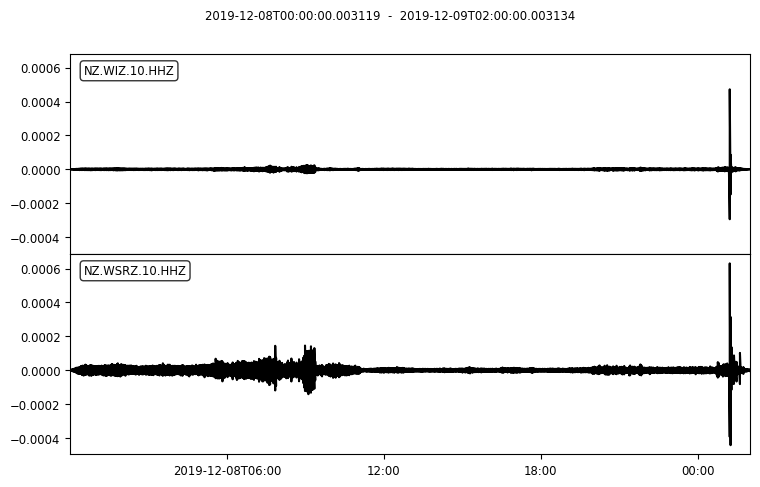

In [1]:
# Standard imports
import os
import numpy as np
import matplotlib.pyplot as plt
import obspy
from obspy.clients.fdsn import Client

# These 2 lines give us access to the GeoNET (New Zealand) digital seismic network data
#from obspy.clients.fdsn import Client as FDSN_Client
client_geonet = Client("GEONET")

# Define the data that we want
start_time = obspy.UTCDateTime("2019-12-08T00:00:00.000")
hours_of_data = 26
end_time = start_time + hours_of_data * 60 * 60
net = "NZ" # New Zealand national network
stations = ["WIZ", "WSRZ"] # two stations on White Island
chan = "HHZ" # Vertical high-rate channel (100 samples per second)

# Loading data from the GeoNET client is slow. So when we read it, we will save it to a file. 
# Then if we run this program again, we just need to read the file.
fname = 'WhiteIslandFinal26Hours_VEL.mseed'
if os.path.exists(fname):
    # the file already exists, so read it
    print("%s exists. Reading." % fname)
    VEL = obspy.read(fname)
else:
    st = obspy.Stream() # this will hold our raw seismic data
    for station in stations:   
        this_st = client_geonet.get_waveforms(net, station,"*", chan, start_time, end_time, attach_response=True)
        for tr in this_st:
            st = st.append(tr)
    
    # remove instrument response
    VEL = st.copy()
    VEL.detrend(type='linear') # remove a linear trend
    VEL.filter('bandpass', freqmin=0.1, freqmax=25.0, zerophase=True, corners=2) # filter from 0.1 - 25 Hz
    VEL.remove_response(output='VEL')
    VEL.write(fname)
print(VEL)
print('Done.')
VEL.plot();

In [2]:
import sys
sys.path.append('.')
import IceWeb
st = VEL.copy()
spobj = IceWeb.icewebSpectrogram(stream=st.trim(starttime=end_time-2*3600,endtime=end_time-3600))

# Unscaled, amplitude units

(<Figure size 414.72x544.32 with 8 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:ylabel='     WIZ.HHZ'>,
        <AxesSubplot:>,
        <AxesSubplot:xlabel='Time [s]', ylabel='     WSRZ.HHZ'>],
       dtype=object))

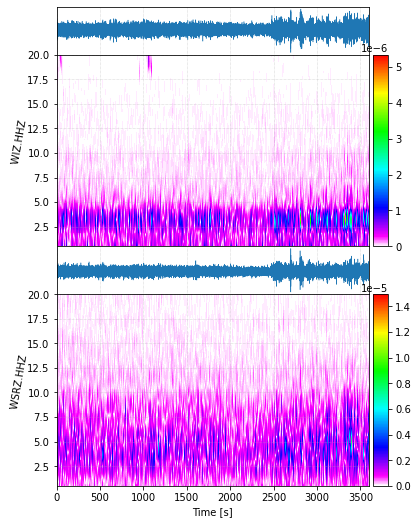

In [3]:
sgramfile = 'myspecgram_unscaled_amplitude.png'
spobj.plot(outfile=sgramfile)

# Best overall scale, amplitude units

(<Figure size 414.72x544.32 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:ylabel='     WIZ.HHZ'>,
        <AxesSubplot:>,
        <AxesSubplot:xlabel='Time [s]', ylabel='     WSRZ.HHZ'>],
       dtype=object))

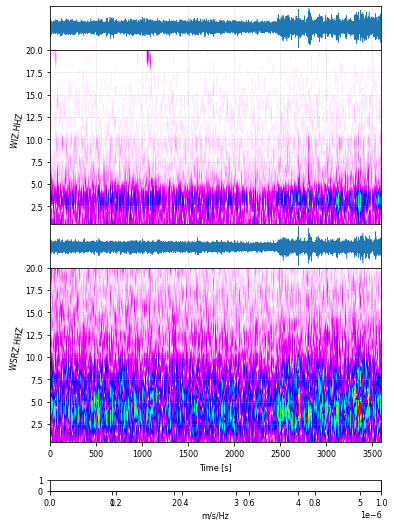

In [4]:
sgramfile = 'myspecgram_scaled_amplitude.png'
spobj.plot(outfile=sgramfile, equal_scale=True)

# Fixed overall scale, amplitude units

(<Figure size 414.72x544.32 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:ylabel='     WIZ.HHZ'>,
        <AxesSubplot:>,
        <AxesSubplot:xlabel='Time [s]', ylabel='     WSRZ.HHZ'>],
       dtype=object))

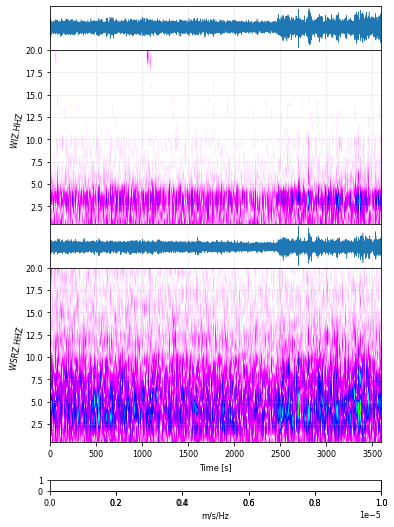

In [5]:
sgramfile = 'myspecgram_fixed_amplitude.png'
spobj.plot(outfile=sgramfile, clim=[1e-8, 1e-5])

# Unscaled, decibel (dB) units

(<Figure size 414.72x544.32 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Unscaled'}>,
        <AxesSubplot:ylabel='     WIZ.HHZ'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='Time [s]', ylabel='     WSRZ.HHZ'>],
       dtype=object))

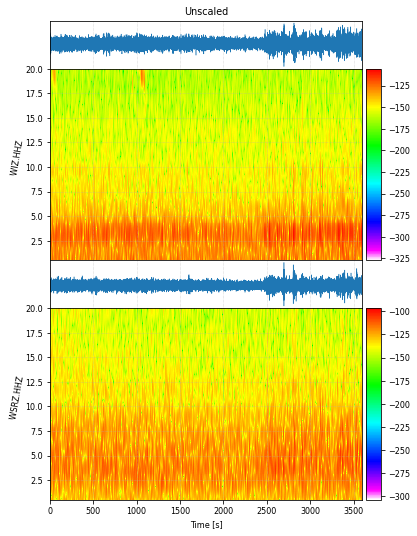

In [7]:
sgramfile = 'myspecgram_unscaled_db.png'
spobj.plot(outfile=sgramfile, dbscale=True, title='Unscaled')

# Best overall scale, decibel (dB) units

(<Figure size 414.72x544.32 with 6 Axes>,
 array([<AxesSubplot:title={'center':'Scaled'}>,
        <AxesSubplot:ylabel='     WIZ.HHZ'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='Time [s]', ylabel='     WSRZ.HHZ'>],
       dtype=object))

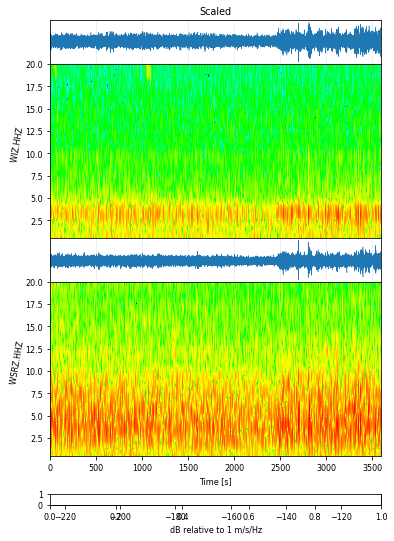

In [8]:
sgramfile = 'myspecgram_scaled_db.png'
spobj.plot(outfile=sgramfile, equal_scale=True, dbscale=True, title='Scaled')

# Fixed overall scale, decibel (dB) units

(<Figure size 414.72x544.32 with 6 Axes>,
 array([<AxesSubplot:title={'center':'Fixed'}>,
        <AxesSubplot:ylabel='     WIZ.HHZ'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='Time [s]', ylabel='     WSRZ.HHZ'>],
       dtype=object))

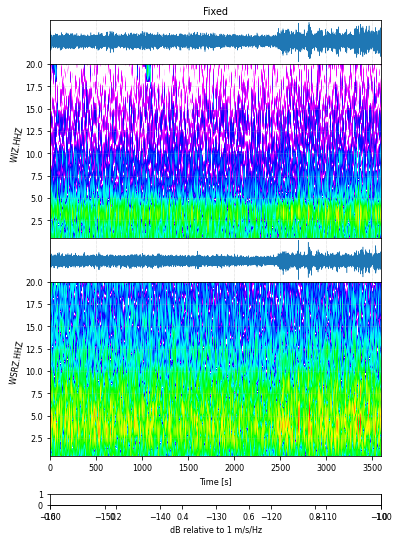

In [9]:
sgramfile = 'myspecgram_fixed_db.png'
spobj.plot(outfile=sgramfile, clim=[1e-8, 1e-5], dbscale=True, title='Fixed')